In [16]:
# created by G Oldford
# last edited Jan 5 2024

# purpose: run trend analysis for each grid cell for several variables

# second attempt to detect long-term trends from model outputs
# first attempt was using inputs prepped for Ecospace

import xarray as xr
import os
import numpy as np
import pickle
import csv

import cmocean as cm

import mpl_toolkits
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from matplotlib import patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

import netCDF4 as nc

# load bathy and tmask for plotting
with nc.Dataset('..//..//data//bathymetry//bathy_salishsea_1500m_20210706.nc') as bath:
    navlon=bath.variables['nav_lon'][:]
    navlat=bath.variables['nav_lat'][:]
    bathy=bath.variables['Bathymetry'][:]
#     bathy=np.sum(mesh.variables['bathymetry'][0,:])#*mesh.variables['e3t_0'][0,:,:,:],0)
    
with nc.Dataset('..//..//data//mesh mask//mesh_mask_20210406.nc') as mesh:
#     print(mesh.variables)
    tmask=mesh.variables['tmask'][:]
    
grid_p = '../../data/bathymetry/'
grid_f = 'bathy_salishsea_1500m_20210706.nc'
grid = xr.open_dataset(os.path.join(grid_p, grid_f), mask_and_scale=False)
    

In [45]:
def make_map(ax, grid, w_map=[-124, -123.9, 47.7, 50.6], 
             rotation=39.2, 
             par_inc=0.25,
             mer_inc=0.5, 
             fs=14,
             bg_color='#e5e5e5'
            ):
    """
    """
    #fcolor='burlywood'
    fcolor='white'
    # Make projection
    m = Basemap(ax=ax, 
                projection='lcc', resolution='c',
                lon_0=(w_map[1] - w_map[0]) / 2 + w_map[0] + rotation,
                lat_0=(w_map[3] - w_map[2]) / 2 + w_map[2],
                llcrnrlon=w_map[0], urcrnrlon=w_map[1],
                llcrnrlat=w_map[2], urcrnrlat=w_map[3])
    
    # Add features and labels
    x, y = m(grid.nav_lon.values, grid.nav_lat.values)
    ax.contourf(x, y, grid.Bathymetry, [-0.01, 0.01], colors=fcolor)
    ax.contour(x, y, grid.Bathymetry, [-0.01, 0.01], colors='black', linewidths=0.1)
    ax.contourf(x, y, grid.Bathymetry, [0.011,500], colors=bg_color)

    #     m.drawmeridians(np.arange(-125.5, -122, mer_inc), labels=[0, 0, 0, 1], linewidth=0.2, fontsize=fs)
    m.drawmeridians(np.arange(-125.5, -122, mer_inc), labels=[0, 0, 0, 0], linewidth=0.2, fontsize=fs)
#     m.drawparallels(np.arange(48, 51, par_inc), labels=[1, 0, 0, 0], linewidth=0.2, fontsize=fs)
    m.drawparallels(np.arange(47, 51, par_inc), labels=[0, 0, 0, 0], linewidth=0.2, fontsize=fs)
    
    return m

def adjust_map(ax, 
               lat_bl=47.8, 
               lon_bl=-123.2, 
               lat_br=48.8, 
               lon_br=-122.28,
               lat_tl=50.3,
               lon_tl=-124.75,
               lat_bl2=48.2,
               lon_bl2=-123.5,
               label_grid=False
              ):
    #fcolor='burlywood'
    fcolor='white'
    # set width using map units
    # bottom left
    x_bl,y_bl = m(lon_bl,lat_bl)
    x_br,_ = m(lon_br,lat_br)
    ax.set_xlim(x_bl, x_br)

    # top left
    x_tl, y_tl = m(lon_tl, lat_tl)
    x_bl,y_bl = m(lon_bl2,lat_bl2)
    ax.set_ylim(y_bl, y_tl)

    # fix a little path in bottom right
    lccx_TL, lccy_TL = m(-122.83, 49.4)
    lccx_BR, lccy_BR = m(-122.58, 48.7)
    lccx_BL, lccy_BL = m(-122.33, 48.7)
    lccw = lccx_BL - lccx_BR
    lcch = lccy_TL - lccy_BL

    ax.add_patch(patches.Rectangle(
                (lccx_BL, lccy_BL), lccw, lcch, 
                facecolor=fcolor, edgecolor='k',
                linewidth=0,
                zorder=0))
    
    if label_grid:
#         rotation = 0
#         ax.annotate("49.5 N", xy=(m(-124.8, 49.5)), xytext=(m(-125, 49.5)),
#                     xycoords='data', textcoords='data',
#                     ha='right', va='center', fontsize=8, rotation=rotation)
        fsmer=7.5
        ax.annotate("50.5N", xy=(m(-123.99, 50.43)), xytext=(m(-123.95, 50.43)),
                    xycoords='data', textcoords='data',
                    ha='left', va='center', fontsize=fsmer, rotation=-30)

        ax.annotate("123.5W", xy=(m(-123.65, 50.05)), xytext=(m(-123.65, 50.15)),
                    xycoords='data', textcoords='data',
                    ha='left', va='center', fontsize=fsmer, rotation=60)
        ax.annotate("50N", xy=(m(-123.5, 49.94)), xytext=(m(-123.42, 49.94)),
                    xycoords='data', textcoords='data',
                    ha='left', va='center', fontsize=fsmer, rotation=-30)
        ax.annotate("49.5N", xy=(m(-123.06, 49.4)), xytext=(m(-122.9, 49.4)),
                    xycoords='data', textcoords='data',
                    ha='left', va='center', fontsize=fsmer, rotation=-30)
        
        ax.annotate("122.5W", xy=(m(-122.8, 49.15)), xytext=(m(-122.61, 49.15)),
                    xycoords='data', textcoords='data',
                    ha='left', va='center', fontsize=fsmer, rotation=60)
        
        ax.annotate("49N", xy=(m(-122.65, 49)), xytext=(m(-122.4, 48.93)),
                    xycoords='data', textcoords='data',
                    ha='left', va='center', fontsize=fsmer, rotation=-30)
#         ax.annotate("", xy=(m(-123.5, 50)), xytext=(m(-123.4, 50)),
#                     xycoords='data', textcoords='data',
#                     ha='left', va='center', fontsize=8, rotation=rotation)
        
#         rotation = -30
#         ax.annotate("50 N", xy=(m(-124.3, 50)), xytext=(m(-124.3, 50.08)),
#                     xycoords='data', textcoords='data',
#                     ha='right', va='center', fontsize=8, rotation=rotation)
#         ax.annotate("49 N", xy=(m(-124.3, 49)), xytext=(m(-124.3, 49.08)),
#                     xycoords='data', textcoords='data',
#                     ha='right', va='center', fontsize=8, rotation=rotation)
      


    
def custom_formatter(x, pos):
    return f'{x:.2f}'

def custom_formatter2(x, pos):
    return f'{x:.1f}'

xy lats lons don't look right here but do in panel


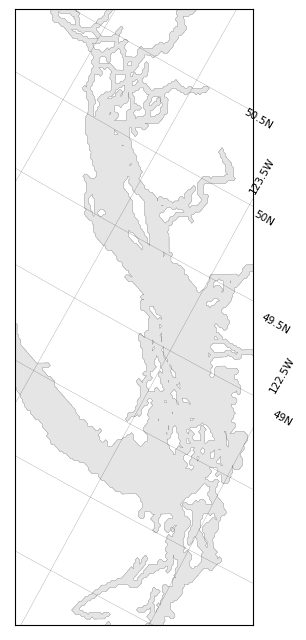

In [46]:
# test grey rotated map 
fig, ax = plt.subplots(figsize=(5,8)) #w,h
m = make_map(ax,grid,
             w_map=[-130, -115, 41, 60],
             rotation=36,
             par_inc=0.5,
             mer_inc=1
            )

adjust_map(ax, lat_bl=46.8, lon_bl=-123.3, 
           lat_br=47.8, lon_br=-121.7,
           lat_tl=50.9, lon_tl=-124.75,
           lat_bl2=47.2, lon_bl2=-123.3,
           label_grid=True
              )
# adjust_map(ax)
print("xy lats lons don't look right here but do in panel")
plt.show()

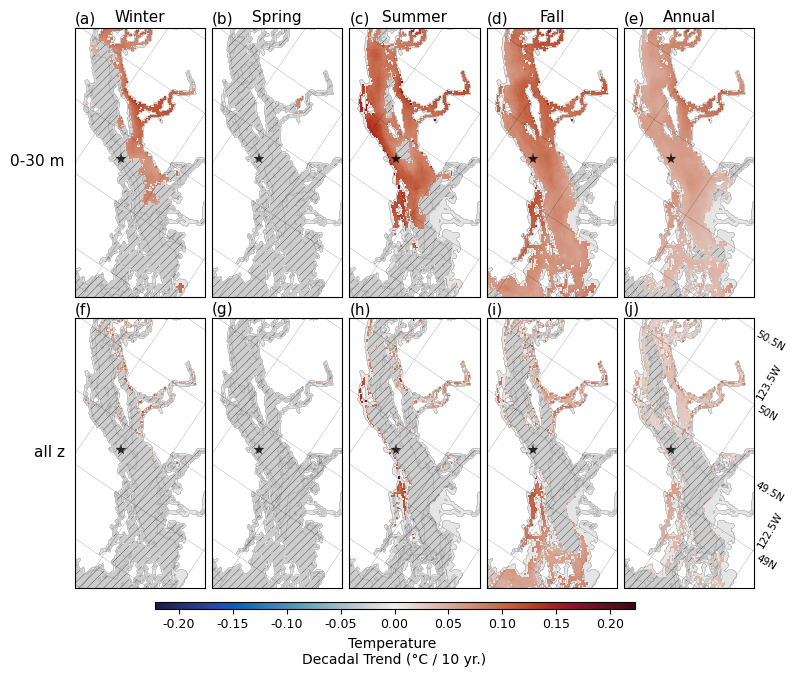

In [47]:
# plot temp 
# (already inspected others, nothing too interesting, see below)
nrows=2
#figsize_h = 10 # poster
#figsize_w = 12
figsize_h = 7 # 8.5 for all
figsize_w = 8
fig, axes = plt.subplots(nrows=nrows, ncols=5, figsize=(figsize_w, figsize_h)) # w,h
fs=12 # fontsize map
fs1 = 11 # pub
#fs1 = 14 # poster

fs2 = 11 # pub
#fs2 = 14 # poster

# colorbar font size
fs3 = 10 # pub
#fs3 = 12 # poster

# colorbar label
fs4 = 9 # pub
#fs4 = 12 # poster

## star marker size
ms = 8 # pub
#ms = 12 # poster

# season label y
seas_y = 0.99 # pub
#seas_y = 1.0 # poster

mask_sig = True # 
use_mesh = True # alt way to visualize

test_p = '../../data/outputs/extract_results_216/trend_output/anom_trend_frommonth/'
#test_p = 'D:/nemo_outputs/extract_results_203/trend_output/anom_trend_frommonth/'

row_labels = ['0-30 m', '30-150 m', '>150 m', 'all z']
row_labels = ['0-30 m', 'all z']
column_labels = ['Winter', 'Spring', 'Summer', 'Fall', 'Annual']
seasons = ['winter', 'spring', 'summer', 'fall', 'annual']
seasons = ['winter', 'spring', 'summer', 'fall', 'annual']
depth_groups = ["0to30m", "30to150m", "gt150m", "allz"]
depth_groups = ["0to30m", "allz"]

variables = ['votemper']#, 'votemper','vosaline', 'vomecrty', 'vozocrtx']#,
#variables2D = ['mldkz5', 'mldr10_1']
labelx = f'Temperature \nDecadal Trend (°C / 10 yr.)'
#labelx = f'Salinity \nDecadal Trend (PSU / 10 yr.)'
labell = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v']

num_color_bins = 7
variable_bins = {'votemper':[-0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015, 0.02],
                 'vosaline':[-0.03, -0.015, 0, 0.015, 0.03, 0.045]
                }

# Dictionary to store colorbar handles
colorbars = {}
var_min_max = {}

# label columns
for idx, label in enumerate(column_labels):
    ax = axes[0, idx]  # Get the first row and corresponding column index
    
    ax.set_title(label, fontsize=fs1, y=seas_y)
    
# row labels
for idx, label in enumerate(row_labels):
    ax = axes[idx, 0]
    ax.annotate(label, xy=(0.1, 0.5), xytext=(0.1, 0.5),
                xycoords=ax.yaxis.label, textcoords='offset points',
                ha='right', va='center', fontsize=fs1)
#     ax.annotate(label, xy=(0.1, 0.5), xytext=(-ax.yaxis.labelpad + 3, 0),
#                 xycoords=ax.yaxis.label, textcoords='offset points',
#                 ha='right', va='center', fontsize=fs1)

# get min and max from all files for common colorbar
for variable in variables:
    var_min = np.inf  # Initialize with positive infinity
    var_max = -np.inf  # Initialize with negative infinity

    for season in seasons:
        for depth_group in depth_groups:
            # Load the data for the current variable, depth group, and season
            file_name = f'anom_trend_{variable}_{depth_group}_{season}.nc'
            with nc.Dataset(os.path.join(test_p, file_name)) as test:
                slopes = test.variables['slope'][:]
            
            var_min = min(var_min, np.nanmin(slopes))
            var_max = max(var_max, np.nanmax(slopes))
            
    var_min_max[variable] = (var_min, var_max)

i = 0
for depth_idx, depth_group in enumerate(depth_groups):
    for var_idx, variable in enumerate(variables):
        for season_idx, season in enumerate(seasons):
#             print('season ', season)
#             print('variable ', variable)
#             print('depth ', depth_group)
#             print('row ', depth_idx)
#             print('col ', season_idx + (len(seasons) * var_idx)
            ax = axes[depth_idx, season_idx + (len(seasons) * var_idx)]
            
            # Load the data for the current variable, depth group, and season
            file_name = f'anom_trend_{variable}_{depth_group}_{season}.nc'
            with nc.Dataset(os.path.join(test_p, file_name)) as test:
                navlon = test.variables['nav_lon'][:]
                navlat = test.variables['nav_lat'][:]
                slopes = test.variables['slope'][:]
                sig_tf = test.variables['sig_tf'][:]
            
            m = make_map(ax, grid,
                         w_map=[-130, -115, 41, 60],
                         rotation=43,
                         par_inc=0.5,
                         mer_inc=1,
                         fs=fs,
                         bg_color='#e5e5e5'
                        )
            label_grid = False
            if i == 9: 
                label_grid = True
            adjust_map(ax, label_grid=label_grid)
            
            # apply masks
            slopes = np.ma.masked_where(tmask[0,0,:] == 0, slopes)
            if mask_sig == True: # mask out insignificant trend?
                slopes_insig = np.ma.masked_where(sig_tf != 0, slopes)
                slopes = np.ma.masked_where(sig_tf == 0, slopes)
                x, y = m(navlon, navlat)
                #slopes_insig_masked = np.ma.masked_where(slopes_insig.mask, slopes_insig)
                plt.rcParams['hatch.linewidth'] = 0.2
                c = m.contourf(x, y, slopes_insig, colors='none', hatches=['////'], alpha=0.1)
               
            slopes = slopes * 10 # scale to decadal
            
            if depth_group == '0to30m':
                slopes = np.ma.masked_where(bathy < 20, slopes)
            elif depth_group == '30to150m':
                slopes = np.ma.masked_where(bathy < 150, slopes)
            elif depth_group == 'gt150m':
                slopes = np.ma.masked_where(bathy < 200, slopes)
            elif depth_group == 'allz':
                slopes = np.ma.masked_where(bathy < 30, slopes)

            x, y = m(navlon, navlat)
            
            # for data exploration (bins, colors hardcoded after doing it as below)
            min_val = var_min_max[variable][0] * 0.6
            max_val = var_min_max[variable][1] * 0.6
#             c = m.contourf(x, y, slopes, 
#                            cmap=cm.cm.balance, 
#                            #cmap=cmap,
#                            levels=np.linspace(min_val * 10, max_val * 10, num_color_bins)
#                           )

            if use_mesh:
                c = m.pcolormesh(x, y, slopes, cmap='cmo.balance', shading='auto',
                               vmin=-max_val*10, vmax=max_val*10)
            else:

                boundaries = variable_bins[variable]
                boundaries = np.multiply(boundaries, 10) # scale to decadal
                # the data are not centred on zero
                # so need to manually fiddle
                cmap_balance = plt.cm.get_cmap('cmo.balance',len(boundaries))
                c = m.contourf(x, y, slopes, # decadal scaling 
                               cmap=cmap_balance, 
                               #cmap=cmap,
                               levels=boundaries
                              )
            
            
            if var_idx not in colorbars and season_idx == len(seasons) - 1:
                # Create a colorbar only once per variable
                strtx_wrt_panel = 0.2 
                width_wrt_panel = 0.6
                btm_y=0.12
                #tm_y=0.06
                hght = 0.01
                orientation = 'horizontal'
                
                cax = plt.axes([strtx_wrt_panel, btm_y, width_wrt_panel, hght]) #,left,bottom, width, height
                colorbars[var_idx] = plt.colorbar(c, cax=cax, 
                                                  orientation=orientation, 
                                                  format=ticker.FuncFormatter(custom_formatter))
                colorbars[var_idx].set_label(labelx, fontsize=fs3)  # Customize the label as needed
                colorbars[var_idx].ax.tick_params(labelsize=fs4)
            
            # letter panels
            l_idx = season_idx + len(seasons) * depth_idx
            #ax.text(0.75, 0.97, '(' + labell[l_idx] + ')', ha='left', va='top', fontsize=8, transform=ax.transAxes)
            lab_y = 1.06 # pub / poster
            ax.text(0.0, lab_y, '(' + labell[l_idx] + ')', ha='left', va='top', fontsize=fs2, transform=ax.transAxes)
            
            # add label for nanoose
            x_n, y_n = m(-124.05, 49.31)
            ax.plot(x_n, y_n, alpha=0.8, marker='*', color='k', markersize=ms, markeredgewidth=0.1)
            
            i += 1
            
#plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.15,top=0.95, wspace=0.05, hspace=0.08)
plt.savefig('../../figs/Fig11.png', dpi=300)
plt.show()

